In [2]:
import numpy as np
import center_algorithms as ca
import matplotlib.pyplot as plt
import time

In [3]:

num_points = 100


n_its = 500


n = 1000
r = 20
k = 20

n_trials = 20

In [4]:
center = np.random.rand(n,k)*10
center_rep = np.linalg.qr(center)[0][:,:k]

#generate dataset of points in Gr(k,n)
data = []
for i in range(num_points):
    Y_raw = center_rep + (np.random.rand(n,k)-.5)*.01
    Y = np.linalg.qr(Y_raw)[0][:,:k]
    data.append(Y)

np.random.seed(1)
Y_init = np.linalg.qr(np.random.rand(n,n))[0][:,:k]



In [5]:
vanilla_run_times = []
vanilla_function_values = []
for i in range(n_trials):

    start = time.time()
    vanilla_sln, vanilla_error = ca.irls_flag(data, k, n_its, 'sine', opt_err = 'sine', fast = False, init = Y_init)

    vanilla_run_times.append(time.time()- start)



    vanilla_function_values.append(ca.calc_error_1_2(data, vanilla_sln, 'sine'))


print('total time '+str(np.mean(vanilla_run_times))+' +/- '+str(np.std(vanilla_run_times)))

print('number or iterations ' +str(len(vanilla_error)))

print('objective function value :'+str(np.mean(vanilla_function_values))+' +/- '+str(np.std(vanilla_function_values)))

/home/katrina/a/mankovic/FlagIRLS/center_algorithms.py:299: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if init == 'random':
/home/katrina/a/mankovic/FlagIRLS/center_algorithms.py:304: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  elif init == 'data':


total time 5.451069152355194 +/- 0.7698278584439445
number or iterations 5
objective function value :40.037884424453736 +/- 7.105427357601002e-15


In [6]:
objective_function_value_means = []
objective_function_value_stds = []
stochastic_run_times_means = []
stochastic_run_times_stds = []

xs = [i for i in range(5, num_points,5)]
for num_stochastic_pts in xs:

    total_times = []
    fn_vals = []
    for i in range(n_trials):
        start = time.time()

        stochastic_sln, stochastic_errors = ca.irls_flag(data, k, n_its, 'sine', opt_err = 'sine', fast = False, init = Y_init, stochastic = num_stochastic_pts)

        total_times.append(time.time()- start)
        fn_vals.append(ca.calc_error_1_2(data, stochastic_sln, 'sine'))






    stochastic_run_times_means.append(np.mean(total_times))
    stochastic_run_times_stds.append(np.std(total_times))
    print('total time '+str(stochastic_run_times_means[-1])+ ' +/- ' +str(stochastic_run_times_stds[-1]))

    print('number or iterations ' +str(len(stochastic_errors)))

    objective_function_value_means.append(np.mean(fn_vals))
    objective_function_value_stds.append(np.std(fn_vals))
    print('objective function value :'+str(objective_function_value_means[-1])+ ' +/- ' +str(objective_function_value_stds[-1]))

total time 0.3328486204147339 +/- 0.08416233507113152
number or iterations 2
objective function value :43.64882427101772 +/- 0.022629134767704527
total time 0.3761429190635681 +/- 0.09642696835332312
number or iterations 4
objective function value :41.78513731965852 +/- 0.014505278173056661
total time 0.4347099781036377 +/- 0.12346488328388491
number or iterations 3
objective function value :41.150318145215046 +/- 0.008017797626980381
total time 0.9065131902694702 +/- 0.5077952563619594
number or iterations 4
objective function value :40.824626536603915 +/- 0.006283301183735629
total time 1.0516409516334533 +/- 0.3701168056811398
number or iterations 2
objective function value :40.62844689559594 +/- 0.003788419622782039
total time 1.308992040157318 +/- 0.4253797734228242
number or iterations 2
objective function value :40.49937665128317 +/- 0.004221286531449674
total time 1.4190676093101502 +/- 0.371737571995876
number or iterations 2
objective function value :40.405990291781855 +/- 0.

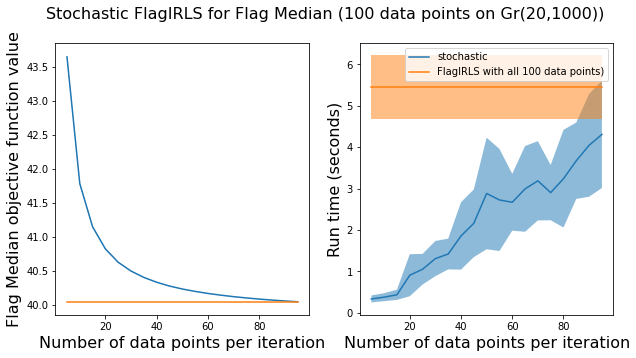

In [30]:
fig, ax = plt.subplots(1,2, figsize = (10,5))

fig.suptitle('Stochastic FlagIRLS for Flag Median (100 data points on Gr(20,1000))', size = 16)

ax[0].plot(xs, objective_function_value_means, label = 'Stochastic FlagIRLS')
ax[0].fill_between(xs, np.array(objective_function_value_means)-np.array(objective_function_value_stds), np.array(objective_function_value_means)+np.array(objective_function_value_stds))
ax[0].plot(xs, [np.mean(vanilla_function_values)]*len(objective_function_value_means), label = 'vanilla FlagIRLS (all 100 data points)')
# plt.fill_between(xs, [np.mean(vanilla_function_values)- np.std(vanilla_function_values)]*len(objective_function_value_means), [np.mean(vanilla_function_values)+ np.std(vanilla_function_values)]*len(objective_function_value_means))
ax[0].set_xlabel('Number of data points per iteration', size = 16)
ax[0].set_ylabel('Flag Median objective function value', size = 16)

ax[1].plot(xs, stochastic_run_times_means, label = 'Stochastic FlagIRLS')
ax[1].fill_between(xs, np.array(stochastic_run_times_means)-np.array(stochastic_run_times_stds), np.array(stochastic_run_times_means)+np.array(stochastic_run_times_stds), alpha = .5)
ax[1].plot(xs, [np.mean(vanilla_run_times)]*len(stochastic_run_times_means), label = 'FlagIRLS with all 100 data points)')
ax[1].fill_between(xs, np.array([np.mean(vanilla_run_times)]*len(stochastic_run_times_means))-np.array([np.std(vanilla_run_times)]*len(stochastic_run_times_means)), np.array([np.mean(vanilla_run_times)]*len(stochastic_run_times_means))+np.array([np.std(vanilla_run_times)]*len(stochastic_run_times_means)), alpha = .5)
ax[1].set_xlabel('Number of data points per iteration', size = 16)
ax[1].set_ylabel('Run time (seconds)', size = 16)
plt.legend()

In [14]:
ax

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)